# SMS Spam Detector


## Loading data

In [1]:
import numpy as np
import pandas as pd

In [2]:
column_names=["spam or ham","message","1","2","3"]
df = pd.read_csv('spam.csv',names = column_names)

In [3]:
df.head()

,spam or ham,message,1,2,3
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.drop(columns=['1','2','3'],inplace=True)

In [5]:
df.rename(columns={"spam or ham":"target","message":"text"},inplace=True)

# Lable Encoding target values

Encode target labels with value between 0 and n_classes-1.

This transformer should be used to encode target values, i.e. y, and not the input X.

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [7]:
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Dealing with null and dublicates 

In [8]:
df.isnull().sum()#no missing vale found

target    0
text      0
dtype: int64

In [9]:
df.duplicated().sum()

403

In [10]:
df[df.duplicated()]['target'].sum()

94

## Removing dublicates

When building an AI model to detect spam SMS messages, it's generally advisable to remove duplicate entries from your dataset. Duplicate entries can introduce bias and make your model's training process less effective. Here are a few reasons why removing duplicates is beneficial:

Reduce Bias: Duplicate entries can artificially inflate the importance of certain samples, leading to biased training. Removing duplicates ensures that each data point has an equal chance of influencing the model's learning process.

Improved Generalization: Duplicate samples can cause overfitting, where the model becomes too specific to the training data and performs poorly on unseen examples. Removing duplicates helps the model generalize better to new, unseen messages.

Efficient Resource Usage: Removing duplicates can reduce the computational resources required during training and inference, making the process more efficient.

In [11]:
df.drop_duplicates(keep='first',inplace=True)

# Checking percentage of spam or not spam values 

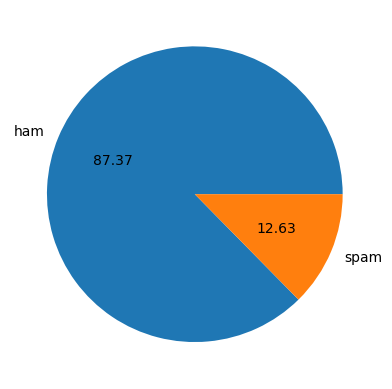

In [12]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

## Calculating no of word in text message

In [13]:
import nltk
df['num_charecters'] = df['text'].apply(len)

In [14]:
df.head()

,target,text,num_charecters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


# Tokenizing Word
## word_tokenize
Return a tokenized copy of text, using NLTK’s recommended word tokenize
## sent_tokenize
sent_tokenize is a function provided by the Natural Language Toolkit (NLTK) library in Python. It is used to tokenize a text into individual sentences. Tokenization refers to the process of splitting a text into smaller units, such as words or sentences.

In [15]:
a = df['text'][0]
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [16]:
nltk.word_tokenize(a)

['Go',
 'until',
 'jurong',
 'point',
 ',',
 'crazy',
 '..',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 '...',
 'Cine',
 'there',
 'got',
 'amore',
 'wat',
 '...']

In [17]:
df['num_words']= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_charecters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [18]:
df['num_sent']= df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_charecters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [19]:
# df.head()

In [20]:
df.describe()

,target,num_charecters,num_words,num_sent
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.924163,18.454246,1.948152
std,0.332253,58.175349,13.325668,1.363792
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


/var/folders/g0/5swzhlfd08zbt0pq6bqf3xs80000gn/T/ipykernel_8897/1950383679.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

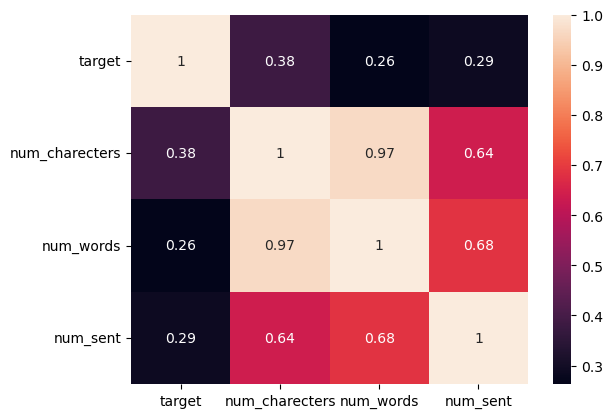

In [21]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

# Using PorterStemmer:
The Porter Stemmer is a widely used stemming algorithm developed by Martin Porter. It is designed to reduce words to their base or root form, known as the stem. The stem may not always be a valid word, but it represents the core meaning of the word.

In [22]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [23]:
def transform_text(text):
    #lower_case
    text = text.lower()
    
    #tokenze
    text = nltk.word_tokenize(text)
    
    #special charecter strings are removed
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    
    text = y[:]
    y.clear()
    
    #stopwords and puntuations are removed
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    #stemmer
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [24]:
transform_text('I love the YT lectures on machine learning. How about you?')

'love yt lectur machin learn'

In [25]:
df['transformed_text'] = df['text'].apply(transform_text)

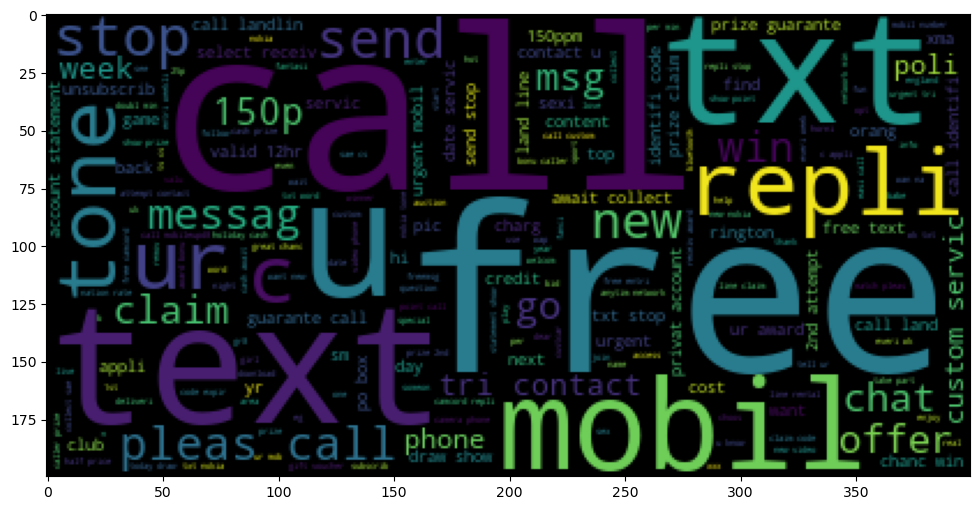

In [26]:
from wordcloud import WordCloud
wc = WordCloud()
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)
plt.show()

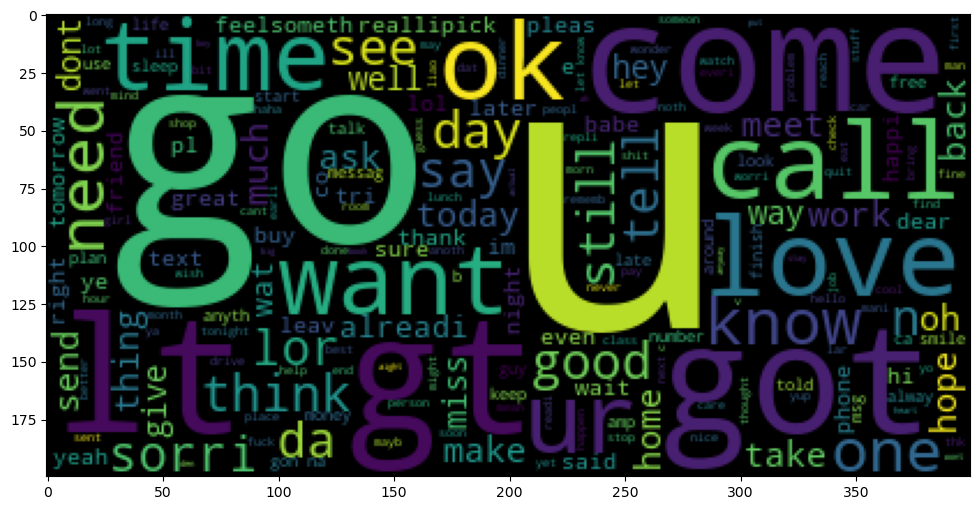

In [27]:
from wordcloud import WordCloud
wc = WordCloud()
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)
plt.show()

In [28]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)
        

In [29]:
len(spam_corpus)

9941

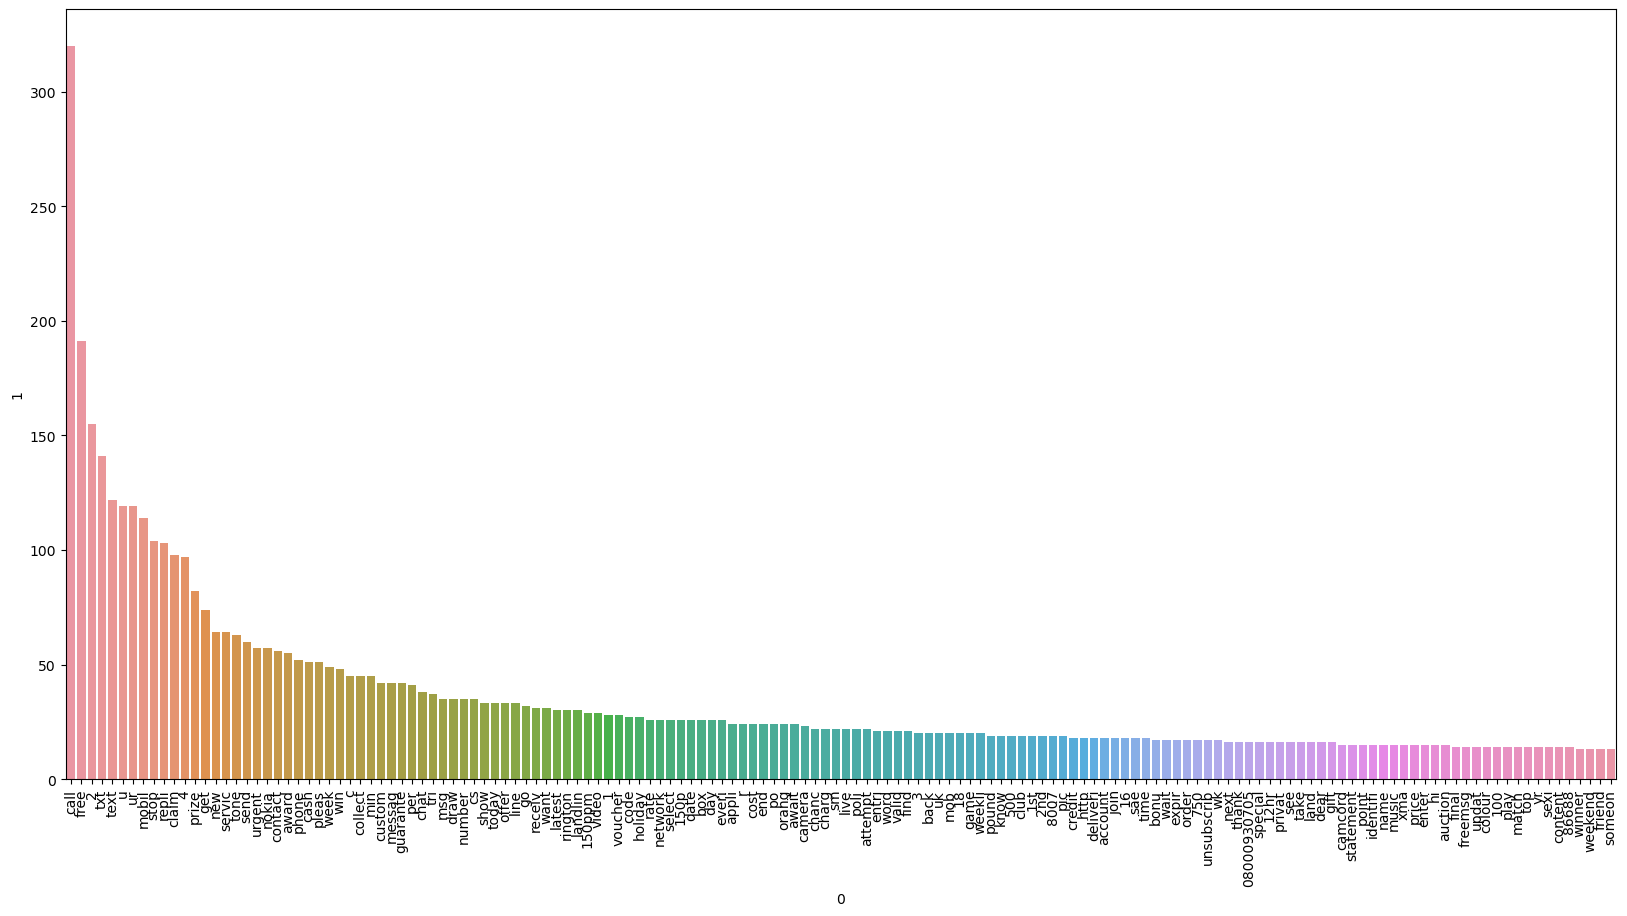

In [30]:
from collections import Counter
plt.figure(figsize=(20,10))
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(150))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(150))[1])
plt.xticks(rotation='vertical')
plt.show()

In [31]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [32]:
len(ham_corpus)

35295

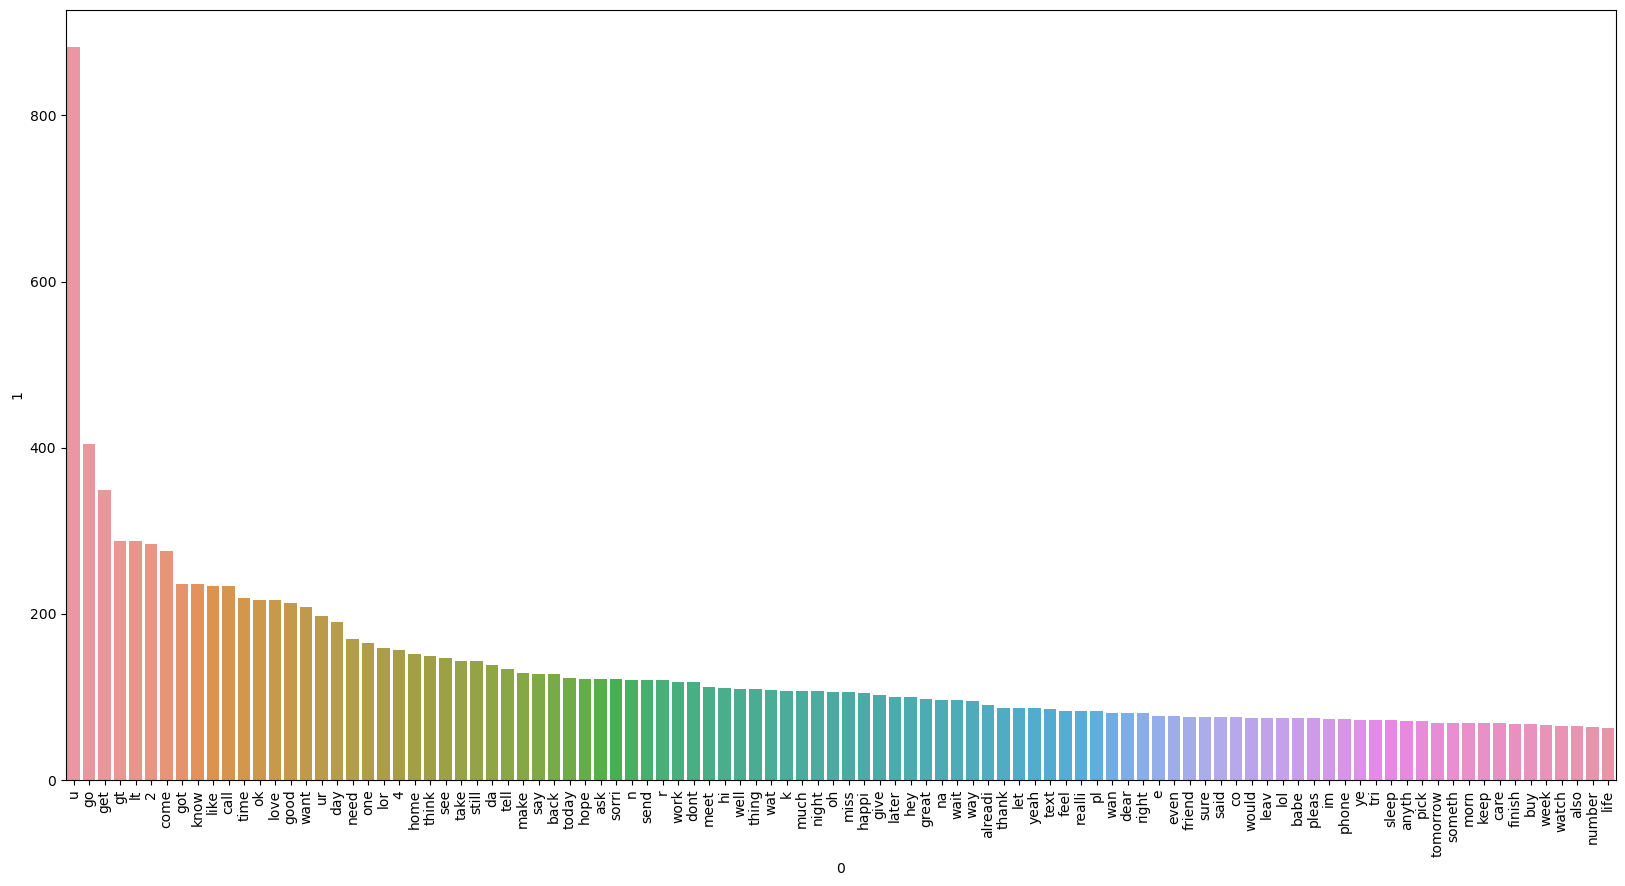

In [33]:
from collections import Counter
plt.figure(figsize=(20,10))
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(100))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(100))[1])

plt.xticks(rotation='vertical')
plt.show()

In [34]:
df.head()

,target,text,num_charecters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [35]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

## MODEL BUILDING

In [36]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [37]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [38]:
y = df['target'].values

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [2]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

NameError: name 'GaussianNB' is not defined

In [41]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8704061895551257
[[788 108]
 [ 26 112]]
0.509090909090909


In [42]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [43]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [44]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [45]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
sgdc = SGDClassifier()
gnb = GaussianNB()
mlp = MLPClassifier()
gbc = GradientBoostingClassifier()
voting_clf = VotingClassifier(estimators=[('rfc', rfc), ('dtc', dtc), ('lrc', lrc)], voting='hard')
lgbm = LGBMClassifier()
catboost = CatBoostClassifier()


In [46]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'XGB': xgb,
    'SGDC': sgdc,
    'GNB': gnb,
    'MLP': mlp,
    'Voting': voting_clf,
    # 'LGBM': lgbm,
    'CatBoost': catboost
}


In [47]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [48]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [49]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.971953578336557
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8350515463917526
For  LR
Accuracy -  0.9564796905222437
Precision -  0.9696969696969697
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8615384615384616
For  ETC
Accuracy -  0.9806576402321083
Precision -  0.9758064516129032
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.9285714285714286
For  XGB
Accuracy -  0.9690522243713733
Precision -  0.9274193548387096
For  SGDC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  GNB
Accuracy -  0.8704061895551257
Precision -  0.509090909090909
For  MLP
Accuracy -  0.9777562862669246
Precision -  0.96
For  Voting
Accuracy -  0.9632495164

In [50]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [51]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.975822,0.974790
1,KN,0.905222,1.000000
2,NB,0.971954,1.000000
3,DT,0.929400,0.835052
4,LR,0.956480,0.969697
5,RF,0.975822,0.982906
6,AdaBoost,0.961315,0.945455
7,BgC,0.957447,0.861538
8,ETC,0.980658,0.975806
9,GBDT,0.947776,0.928571


In [52]:
import pickle
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)
with open('model.pkl', 'wb') as f:
    pickle.dump(mnb, f)




In [53]:
df[df['target']==1]['text'][9]

'Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030'